In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Hpg_Reserve.csv
Data from the Hot Pepper Gourmet (a restaurant review service)

In [2]:
df = pd.read_csv("../data/raw/hpg_reserve.csv", parse_dates=['visit_datetime', 'reserve_datetime'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
hpg_store_id        object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors    int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 61.0+ MB


In [4]:
df.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [5]:
df.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


In [6]:
df.isnull().values.any()

False

## hpg_store_id column

In [7]:
print('The dataset contains info about %s restaurants' % len(df['hpg_store_id'].unique()))

The dataset contains info about 13325 restaurants


In [8]:
df['hpg_store_id'].value_counts()

hpg_2afd5b187409eeb4    1155
hpg_011e799ba201ad2e     822
hpg_9b20c78a9b8179d9     778
hpg_527c60506b80ac72     740
hpg_3f9e56ac6f9435c7     729
hpg_4ca09101fa3a220c     712
hpg_aa65f5cf277f5c1b     709
hpg_530167631513dade     707
hpg_0de000d523008f5c     706
hpg_29550cc7d8a13527     697
hpg_e1980050a6b3cfc7     696
hpg_3fe931c822225cdd     692
hpg_e09b5bfc4466a824     686
hpg_cbaa93169788db8a     685
hpg_7411ea55d6021086     679
hpg_1c65e6289c0b78c6     678
hpg_edcfadc86ee99e14     677
hpg_87769583f14049b2     676
hpg_c3630b10c8b0c89f     674
hpg_35976712b1d926a3     669
hpg_cf6a6cfa63cb148b     655
hpg_e301b8c7a984972f     652
hpg_d105f32ece71d885     645
hpg_c0d867af733bd5ec     644
hpg_0cc19f45942c462f     644
hpg_0fb2b561ddb41d98     642
hpg_14d4ce5b81e686f6     641
hpg_122f093dd3f746a5     639
hpg_053676b196ae1e1e     635
hpg_40aff6385800ebb1     634
                        ... 
hpg_a9d4050d5e5bafce       8
hpg_239861fac439ac3f       8
hpg_589bc7ef207f89e5       8
hpg_24e79ffec0

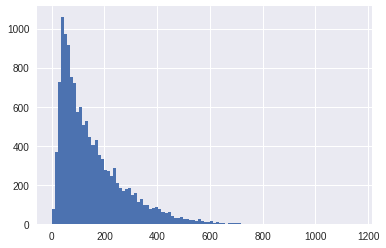

In [9]:
df['hpg_store_id'].value_counts().hist(bins=100)

## visit_datetime

In [10]:
df['visit_datetime'].describe()

count                 2000320
unique                   9847
top       2016-12-16 19:00:00
freq                    10528
first     2016-01-01 11:00:00
last      2017-05-31 23:00:00
Name: visit_datetime, dtype: object

In [11]:
df['visit_datetime'].min()

Timestamp('2016-01-01 11:00:00')

In [12]:
df['visit_datetime'].max()

Timestamp('2017-05-31 23:00:00')

## reserve_datetime

In [13]:
df['reserve_datetime'].describe()

count                 2000320
unique                  11450
top       2016-12-12 21:00:00
freq                      907
first     2016-01-01 00:00:00
last      2017-04-22 23:00:00
Name: reserve_datetime, dtype: object

In [14]:
df['reserve_datetime'].min()

Timestamp('2016-01-01 00:00:00')

In [15]:
df['reserve_datetime'].max()

Timestamp('2017-04-22 23:00:00')

## reserve_visitors

In [16]:
df['visit_datetime_weekdayname'] = df['visit_datetime'].dt.weekday_name
df['reserve_datetime_weekdayname'] = df['reserve_datetime'].dt.weekday_name

In [17]:
df['visit_datetime_month'] = df['visit_datetime'].dt.month
df['reserve_datetime_month'] = df['reserve_datetime'].dt.month

In [18]:
df['reserve_visitors'].describe()

count    2.000320e+06
mean     5.073785e+00
std      5.416172e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      1.000000e+02
Name: reserve_visitors, dtype: float64

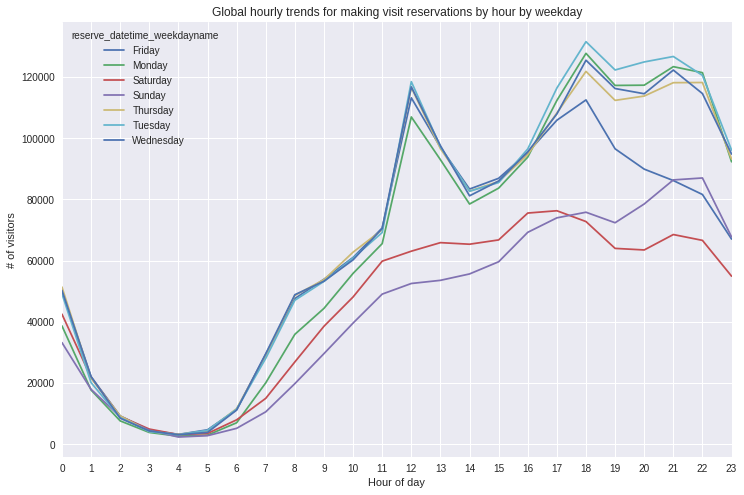

In [19]:
ax = df.pivot_table(index=df['reserve_datetime'].dt.hour, 
                    columns='reserve_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for making visit reservations by hour by weekday',
                                        xticks=np.arange(0, 24, 1))
 
ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

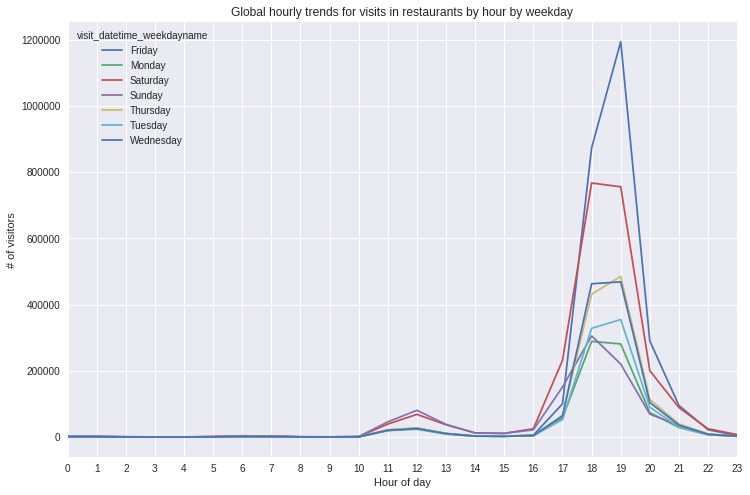

In [20]:
ax = df.pivot_table(index=df['visit_datetime'].dt.hour, 
                    columns='visit_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for visits in restaurants by hour by weekday',
                                        xticks=np.arange(0, 24, 1))

ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

In [21]:
df_visits = df[['visit_datetime', 'reserve_visitors']]

# Set index and delete the column
df_visits.index = df_visits['visit_datetime']
del df_visits['visit_datetime']

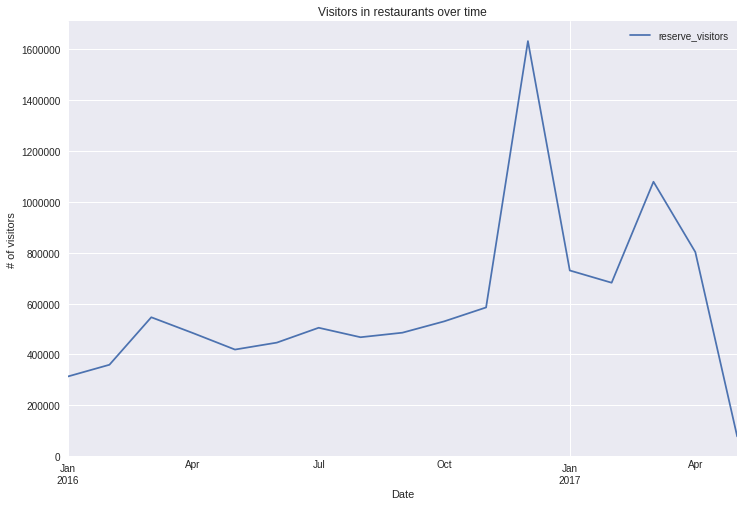

In [22]:
ax = df_visits.resample('M').sum().plot(figsize=(12,8), 
                                        title='Visitors in restaurants over time');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

# set ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())
# set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# IDEAS and THOUGHTS

* what kind of system the HPG is? online? Number of records here is much bigger than for the AIR system..
* does data from AIR and HPG systems overlap?